# The Iris Dataset - Classification
This data sets consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length.

Data available at: 
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Create a classification model of the Iris data set.
Include a visualization of the decision boundries.

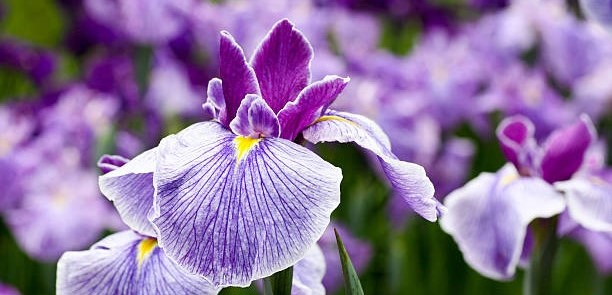

## 1. Import Packages

In [141]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


### 2. Load Dataset

In [128]:
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
df = pd.read_csv(url, names=columns)

In [129]:
# have an initial glance at the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
# see unique vales of Iris type
set(df['type'])
df['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [134]:
# encode type with numbers
df['type2'] = df.type.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [131]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.shape
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
type            150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


### 3. Data Visualization

### 3.1 sepal length and sepal width by type

In [137]:
# we only take the first two features: sepal length and width.
# sepal length 
x_min, x_max = df.sepal_length.min() - .5, df.sepal_length.max() + .5
# sepal width 
y_min, y_max = df.sepal_width.min() - .5, df.sepal_width.max() + .5

([], <a list of 0 Text yticklabel objects>)

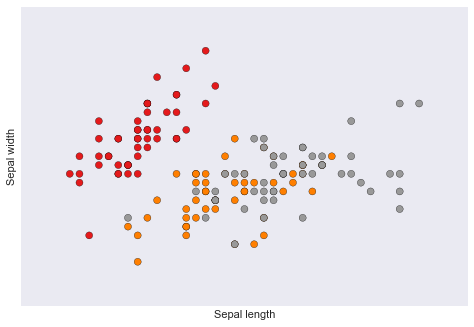

In [138]:
# Plot the training points
plt.scatter(df.sepal_length, df.sepal_width, c=df.type2, cmap=plt.cm.Set1, 
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

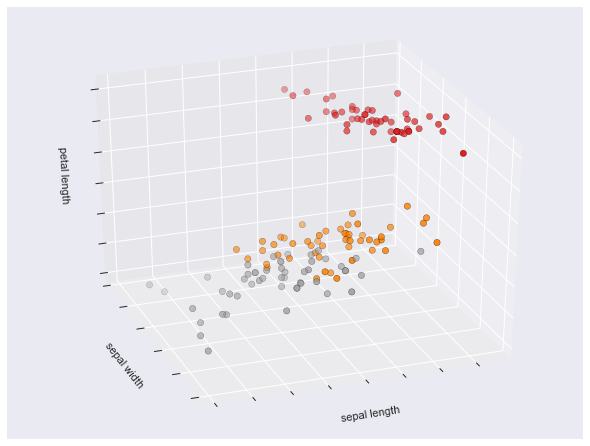

In [140]:
# 3D PLOT --- mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df.sepal_length, df.sepal_width, df.petal_length,
           c=df.type2, cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel("sepal length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal length")
ax.w_zaxis.set_ticklabels([])

plt.show()

### 3.2 Petal Length and Petal Width By Type

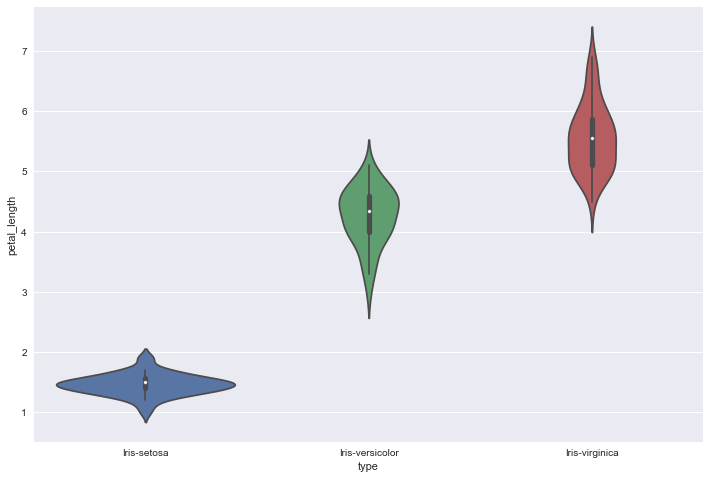

In [151]:
# Petal Length - violin plot 
plt.figure(figsize=(12,8))
sns.violinplot(x='type',y='petal_length', data=df)

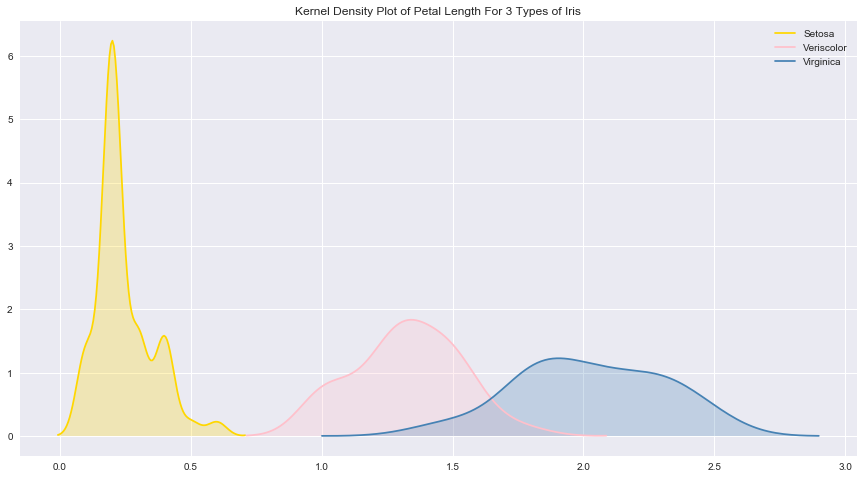

In [167]:
# Pental width - kernel density plot
plt.figure(figsize=(15,8))
sns.kdeplot(df["petal_width"][df['type'] == 'Iris-setosa'], color="gold", shade=True)
sns.kdeplot(df["petal_width"][df['type'] == 'Iris-versicolor'], color="pink", shade=True)
sns.kdeplot(df["petal_width"][df['type'] == 'Iris-virginica'], color="steelblue", shade=True)
plt.legend(['Setosa', 'Veriscolor','Virginica'])
plt.title('Kernel Density Plot of Petal Length For 3 Types of Iris')
plt.show()

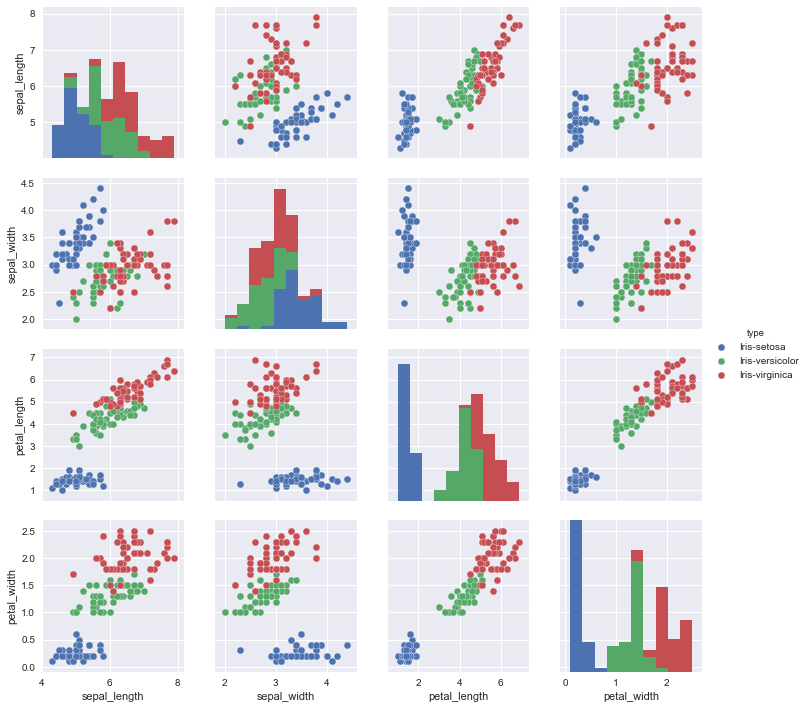

In [203]:
# pair plot
df_final=df.drop('type2',axis=1)
sns.pairplot(df_temp, hue='type')

### 4. Classification

In [185]:
# split trainning and testing datasets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.33)

In [193]:
X_train = train.drop('type',axis=1)
y_train = train['type']
X_test = test.drop('type',axis=1)
y_test = test['type']

In [195]:
# build a decision tree
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                   max_depth=3, min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [197]:
tree.score(X_train, y_train)

0.95999999999999996

In [200]:
tree.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [204]:
tree.score(X_test, y_test)

0.97999999999999998

### Visualization of Decision Boundaries

In [220]:
from graphviz import Digraph
out_file=tree.export_graphviz(tree, out_file=out_file)

ImportError: No module named graphviz

Reference:
http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb#Step-5:-Classification